In [141]:
import pandas as pd
import numpy as np

#Create usefull dataframe
New_weather_steps = pd.read_csv("C:\\Users\\irene\\OneDrive\\Bureaublad\\ML\\ML4QS\\datacheck.csv")
New_weather_steps = New_weather_steps.drop(["Unnamed: 0"] ,axis=1)
#New_steps = weather_steps[['start', 'value_steps']]
#New_weather = weather_steps.iloc[:, 7:35]
#New_weather_steps = pd.concat([New_steps, New_weather], axis=1)
#New_weather_steps["value_heart"].replace(0, np.nan, inplace=True)

#Create new column with steps as integers
New_weather_steps["int_steps"] = New_weather_steps["value_steps"].astype(int)

display(New_weather_steps)

,Unnamed: 0.1,start,end,value_steps,value_heart,value_workout,combined,int_steps
0,0,2022-01-01 00:00:00,2022-01-01 00:10:00,38.841808,82.0,no workout,ExtraHigh0,38
1,1,2022-01-01 00:10:00,2022-01-01 00:20:00,156.509531,77.5,no workout,ExtraHigh0,156
2,2,2022-01-01 00:20:00,2022-01-01 00:30:00,97.817536,78.5,no workout,ExtraHigh0,97
3,3,2022-01-01 00:30:00,2022-01-01 00:40:00,53.407172,73.5,no workout,ExtraHigh0,53
4,4,2022-01-01 00:40:00,2022-01-01 00:50:00,0.000000,75.5,no workout,ExtraHigh0,0
...,...,...,...,...,...,...,...,...
75020,75020,2023-06-05 23:20:00,2023-06-05 23:30:00,0.000000,60.5,no workout,Low0,0
75021,75021,2023-06-05 23:30:00,2023-06-05 23:40:00,0.000000,61.0,no workout,Low0,0
75022,75022,2023-06-05 23:40:00,2023-06-05 23:50:00,0.000000,61.0,no workout,Low0,0
75023,75023,2023-06-05 23:50:00,2023-06-06 00:00:00,0.000000,61.0,no workout,Low0,0


In [140]:
print(New_weather_steps.isna().sum())


Unnamed: 0.1         0
start                0
end                  0
value_steps          0
value_heart      48819
value_workout        0
combined             0
int_steps            0
dtype: int64


In [105]:
#frequency of number of steps
print(len(New_weather_steps[New_weather_steps['value_steps']==0]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=50])- len(New_weather_steps[New_weather_steps['value_steps']<=0]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=100])- len(New_weather_steps[New_weather_steps['value_steps']<=50]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=200])- len(New_weather_steps[New_weather_steps['value_steps']<=100]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=300])- len(New_weather_steps[New_weather_steps['value_steps']<=200]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=400])- len(New_weather_steps[New_weather_steps['value_steps']<=300]))
print(len(New_weather_steps[New_weather_steps['value_steps']<=500])- len(New_weather_steps[New_weather_steps['value_steps']<=400]))
print(len(New_weather_steps[New_weather_steps['value_steps']>500]))

50914
10079
4439
4050
2098
1073
651
1721


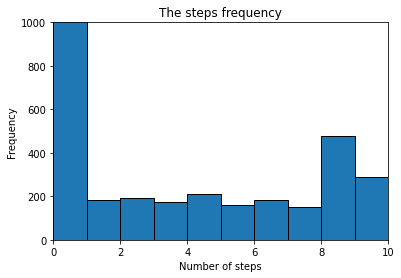

In [106]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


data = New_weather_steps['int_steps']
bin_width = 1

# Calculate the bin edges
bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)

ax.hist(data, bins=bin_edges, edgecolor='black')

# Set x-axis and y-axis labels
ax.set_xlabel('Number of steps')
ax.set_ylabel('Frequency')

# Set the title of the plot
ax.set_title('The steps frequency')
ax.set_xlim(0, 10)
ax.set_ylim(0, 1000)

plt.show()

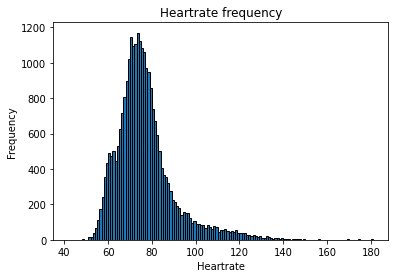

In [107]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

data = New_weather_steps['value_heart']
bin_width = 1

# Calculate the bin edges
bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)

ax.hist(data, bins=bin_edges, edgecolor='black')

# Set x-axis and y-axis labels
ax.set_xlabel('Heartrate')
ax.set_ylabel('Frequency')

# Set the title of the plot
ax.set_title('Heartrate frequency')
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 100)

plt.show()

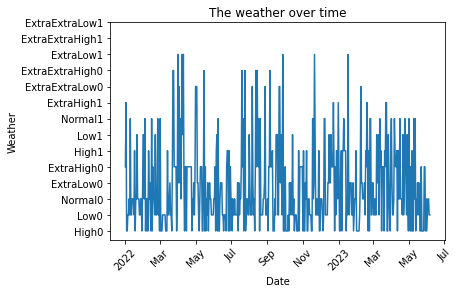

In [134]:
import matplotlib.dates as mdates
New_weather_steps['start'] = pd.to_datetime(New_weather_steps['start'])
dates = New_weather_steps['start']
categories = New_weather_steps['combined']

category_order = ['High0','Low0','Normal0', 'ExtraLow0', 'ExtraHigh0', 'High1',  'Low1',  'Normal1', 'ExtraHigh1',
                   'ExtraExtraLow0','ExtraExtraHigh0','ExtraLow1',  'ExtraExtraHigh1',  'ExtraExtraLow1']

category_mapping = {category: i for i, category in enumerate(category_order)}
category_values = [category_mapping[category] for category in categories]

subset_indices = np.linspace(0, len(dates) - 1, 500, dtype=int)
subset_dates = [dates[i] for i in subset_indices]
subset_values = [categories[i] for i in subset_indices]
subset_categories = [category_mapping[category] for category in subset_values]  # Use category_mapping to get numeric values

fig, ax = plt.subplots()
ax.plot(subset_dates, subset_categories)

# Set the number of desired ticks
num_ticks = 50

# Calculate the step size to evenly distribute the ticks
step = len(subset_dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Weather')
ax.set_title('The weather over time')

# Set the y-axis tick labels in the desired order
ax.set_yticks(range(len(category_order)))
ax.set_yticklabels(category_order)

# Organize the dates on the x-axis
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [131]:
print(New_weather_steps['combined'].value_counts())

High0              16884
Low0               16213
Normal0            11478
ExtraLow0           7722
ExtraHigh0          6840
High1               5112
Low1                3624
Normal1             3426
ExtraHigh1          1254
ExtraExtraLow0       984
ExtraExtraHigh0      744
ExtraLow1            744
Name: combined, dtype: int64


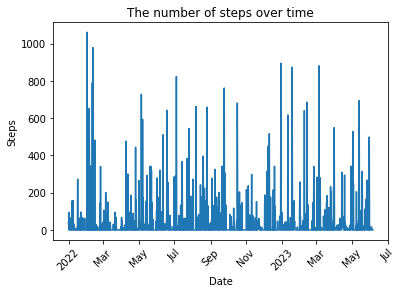

In [112]:
import matplotlib.dates as mdates
# Convert 'startDate' column to datetime objects
New_weather_steps['start'] = pd.to_datetime(New_weather_steps['start'])

dates = New_weather_steps['start']
values = New_weather_steps['value_steps']

# Select a subset of values to plot
subset_indices = np.linspace(0, len(dates) - 1, 1000, dtype=int)  # Select 100 evenly spaced indices
subset_dates = dates[subset_indices]
subset_values = values[subset_indices]

fig, ax = plt.subplots()
ax.plot(subset_dates, subset_values)  # Use scatter plot with markers

ax.set_xlabel('Date')
ax.set_ylabel('Steps')
ax.set_title('The number of steps over time')

# Organize the dates on the x-axis
locator = mdates.AutoDateLocator()  # Automatically determine the date tick positions
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45)

plt.show()

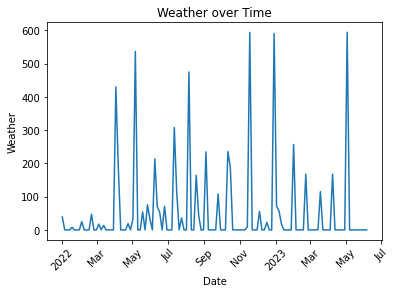

In [117]:
# Convert 'startDate' column to datetime objects
New_weather_steps['start'] = pd.to_datetime(New_weather_steps['start'])

dates = New_weather_steps['start']
categories = New_weather_steps['combined']

# Define the desired order of categories
category_order = ['Normal0', 'Normal1','High0', 'High1', 'Low0', 'Low1', 'ExtraHigh0', 'ExtraHigh1', 'ExtraLow0', 'ExtraLow1', 'ExtraExtraHigh0', 'ExtraExtraHigh1', 'ExtraExtraLow0', 'ExtraExtraLow1']

# Create a dictionary to map categories to numeric values
category_mapping = {category: i for i, category in enumerate(category_order)}

# Map the categories to numeric values
category_values = [category_mapping[category] for category in categories]

# Select a subset of values to plot
subset_indices = np.arange(0, 75026, 600)  # Example indices of the values to plot
subset_dates = [dates[i] for i in subset_indices]
subset_values = [values[i] for i in subset_indices]
subset_categories = [category_values[i] for i in subset_indices]

fig, ax = plt.subplots()
ax.plot(subset_dates, subset_values)  # Use plot instead of scatter

# Set the number of desired ticks
num_ticks = 5

# Calculate the step size to evenly distribute the ticks
step = len(dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Weather')
ax.set_title('Weather over Time')

# Set y-axis tick labels to the category names
#ax.set_yticks(range(len(category_order)))
#ax.set_yticklabels(category_order)

# Organize the dates on the x-axis
locator = mdates.AutoDateLocator()  # Automatically determine the date tick positions
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [95]:
#Ik dacht misschien iets met pearson's correlation test, dus deze functie had ik uit de Python3Code gehaald. 
#Hij moet nog aangepast worden op onze set
from scipy.stats import pearsonr
from operator import itemgetter
import numpy as np

def pearson_selection(max_features, X_train, y_train):
    correlations = []
    full_columns_and_corr = []
    abs_columns_and_corr = []

    # Compute the absolute correlations per column.
    for i in range(0, len(X_train.columns)):
        corr, p = pearsonr(X_train[X_train.columns[i]], y_train)
        correlations.append(abs(corr))
        if np.isfinite(corr):
            full_columns_and_corr.append((X_train.columns[i], corr))
            abs_columns_and_corr.append((X_train.columns[i], abs(corr)))

    sorted_attributes = sorted(abs_columns_and_corr,key=itemgetter(1), reverse=True)
    res_list = [x[0] for x in sorted_attributes[0:max_features]]

    # And return the most correlated ones.
    return res_list, sorted(full_columns_and_corr,key=itemgetter(1), reverse=True)

In [102]:
print(New_weather_steps['combined'].value_counts())

High0              16884
Low0               16213
Normal0            11478
ExtraLow0           7722
ExtraHigh0          6840
High1               5112
Low1                3624
Normal1             3426
ExtraHigh1          1254
ExtraExtraLow0       984
ExtraExtraHigh0      744
ExtraLow1            744
Name: combined, dtype: int64


In [2]:
New_weather_steps.to_csv('New_weather_steps.csv')